In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 런타임 다시시작

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileExistsError: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 사용할 라이브러리 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data_origin = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1008/페이즈별 _금액_변화.csv',encoding='cp949',index_col=0)

In [ ]:
data_origin.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128751 entries, 0 to 128750
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   고객번호    128751 non-null  int64  
 1   대분류명    128751 non-null  object 
 2   구매금액_1  128751 non-null  int64  
 3   구매금액_2  128751 non-null  int64  
 4   구매금액_3  128751 non-null  int64  
 5   구매금액_4  128751 non-null  int64  
 6   1p      128751 non-null  float64
 7   2p      128751 non-null  float64
 8   3p      124140 non-null  float64
 9   1ps     128751 non-null  object 
 10  2ps     128751 non-null  object 
 11  3ps     128751 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 12.8+ MB


In [ ]:
data_std = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1007/기준_3P_분기제휴사_구매금액_1006_3.csv',index_col=0)

In [ ]:
data_std.head() # 레이블: 성별 원핫: 나이

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,1_평균구매시간,2_평균구매시간,3_평균구매시간,4_평균구매시간,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수,1P_sort_de,2P_sort_de,3P_sort_de
0,1,M,60대,19925355,34116312,17898365,13102518,0.712206,-0.475372,-0.267949,19703210.0,21800.0,200345.0,0.0,33340300.0,376140.0,399872.0,0.0,17382750.0,208136.0,307479.0,0.0,12800890.0,184900.0,116728.0,0.0,14,15,14,15,아침형,아침형,아침형,아침형,21,34,29,23,13,-5,-6
1,2,M,60대,24323230,21922100,27791610,25843820,-0.098718,0.267744,-0.070086,24292730.0,30500.0,0.0,0.0,21875650.0,46450.0,0.0,0.0,27486650.0,132500.0,0.0,172460.0,25799820.0,0.0,0.0,44000.0,14,14,14,14,아침형,아침형,아침형,아침형,19,23,26,21,4,3,-5
2,3,M,60대,851215,1042554,592280,679118,0.224783,-0.431895,0.146616,80000.0,0.0,771215.0,0.0,0.0,6960.0,1035594.0,0.0,0.0,0.0,592280.0,0.0,0.0,0.0,679118.0,0.0,12,12,13,13,아침형,아침형,아침형,아침형,21,22,16,23,1,-6,7
3,4,F,60대,5042106,4257510,3656937,3737257,-0.155609,-0.141062,0.021964,4628260.0,80060.0,333786.0,0.0,3711520.0,420740.0,125250.0,0.0,3170780.0,333864.0,152293.0,0.0,2764050.0,759402.0,213805.0,0.0,14,14,14,14,아침형,아침형,아침형,아침형,24,29,27,24,5,-2,-3
4,5,M,60대,5460150,2225730,2934930,2616260,-0.592368,0.318637,-0.108578,5444150.0,16000.0,0.0,0.0,2225730.0,0.0,0.0,0.0,2917380.0,0.0,0.0,17550.0,2586960.0,0.0,0.0,29300.0,15,15,15,14,아침형,아침형,아침형,아침형,18,14,12,13,-4,-2,1


In [ ]:
data_std.fillna(0,inplace=True)

In [ ]:
data_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19147 entries, 0 to 19146
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   고객번호          19147 non-null  int64  
 1   성별            19147 non-null  object 
 2   연령대           19147 non-null  object 
 3   14년 상반기       19147 non-null  int64  
 4   14년 하반기       19147 non-null  int64  
 5   15년 상반기       19147 non-null  int64  
 6   15년 하반기       19147 non-null  int64  
 7   1P            19147 non-null  float64
 8   2P            19147 non-null  float64
 9   3P            19147 non-null  float64
 10  구매금액_1_A      19147 non-null  float64
 11  구매금액_1_B      19147 non-null  float64
 12  구매금액_1_C      19147 non-null  float64
 13  구매금액_1_D      19147 non-null  float64
 14  구매금액_2_A      19147 non-null  float64
 15  구매금액_2_B      19147 non-null  float64
 16  구매금액_2_C      19147 non-null  float64
 17  구매금액_2_D      19147 non-null  float64
 18  구매금액_3_A      19147 non-nu

In [ ]:
from sklearn.preprocessing import LabelEncoder

col_name_list = data_std.columns

def enco(x):
  le = LabelEncoder()
  for i in col_name_list:
    if x[i].dtypes == object:
      x[i] = le.fit_transform(x[i])

    else:
  for i in col_name_list:
    if x[i].dtypes == object:
      x[i] = le.fit_transform(x[i])

enco(data_std)

In [ ]:
data_std.head()



,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,1_평균구매시간,2_평균구매시간,3_평균구매시간,4_평균구매시간,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수,1P_sort_de,2P_sort_de,3P_sort_de
0,1,1,5,19925355,34116312,17898365,13102518,0.712206,-0.475372,-0.267949,19703210.0,21800.0,200345.0,0.0,33340300.0,376140.0,399872.0,0.0,17382750.0,208136.0,307479.0,0.0,12800890.0,184900.0,116728.0,0.0,14,15,14,15,0,0,0,0,21,34,29,23,13,-5,-6
1,2,1,5,24323230,21922100,27791610,25843820,-0.098718,0.267744,-0.070086,24292730.0,30500.0,0.0,0.0,21875650.0,46450.0,0.0,0.0,27486650.0,132500.0,0.0,172460.0,25799820.0,0.0,0.0,44000.0,14,14,14,14,0,0,0,0,19,23,26,21,4,3,-5
2,3,1,5,851215,1042554,592280,679118,0.224783,-0.431895,0.146616,80000.0,0.0,771215.0,0.0,0.0,6960.0,1035594.0,0.0,0.0,0.0,592280.0,0.0,0.0,0.0,679118.0,0.0,12,12,13,13,0,0,0,0,21,22,16,23,1,-6,7
3,4,0,5,5042106,4257510,3656937,3737257,-0.155609,-0.141062,0.021964,4628260.0,80060.0,333786.0,0.0,3711520.0,420740.0,125250.0,0.0,3170780.0,333864.0,152293.0,0.0,2764050.0,759402.0,213805.0,0.0,14,14,14,14,0,0,0,0,24,29,27,24,5,-2,-3
4,5,1,5,5460150,2225730,2934930,2616260,-0.592368,0.318637,-0.108578,5444150.0,16000.0,0.0,0.0,2225730.0,0.0,0.0,0.0,2917380.0,0.0,0.0,17550.0,2586960.0,0.0,0.0,29300.0,15,15,15,14,0,0,0,0,18,14,12,13,-4,-2,1


In [ ]:
data_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19147 entries, 0 to 19146
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   고객번호          19147 non-null  int64  
 1   성별            19147 non-null  int64  
 2   연령대           19147 non-null  int64  
 3   14년 상반기       19147 non-null  int64  
 4   14년 하반기       19147 non-null  int64  
 5   15년 상반기       19147 non-null  int64  
 6   15년 하반기       19147 non-null  int64  
 7   1P            19147 non-null  float64
 8   2P            19147 non-null  float64
 9   3P            19147 non-null  float64
 10  구매금액_1_A      19147 non-null  float64
 11  구매금액_1_B      19147 non-null  float64
 12  구매금액_1_C      19147 non-null  float64
 13  구매금액_1_D      19147 non-null  float64
 14  구매금액_2_A      19147 non-null  float64
 15  구매금액_2_B      19147 non-null  float64
 16  구매금액_2_C      19147 non-null  float64
 17  구매금액_2_D      19147 non-null  float64
 18  구매금액_3_A      19147 non-nu

In [ ]:
data_std_corr = data_std.corr()

In [ ]:
data_std_corr

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,1_평균구매시간,2_평균구매시간,3_평균구매시간,4_평균구매시간,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수,1P_sort_de,2P_sort_de,3P_sort_de
고객번호,1.000000,0.060889,-0.382660,-0.124624,-0.122578,-0.128955,-0.115813,0.034589,0.022902,-0.006415,-0.175211,-0.002398,0.031250,0.059241,-0.137216,0.004075,0.036957,0.065480,-0.140731,0.021070,0.018842,0.063152,-0.124043,0.015143,0.017686,0.064319,0.104244,0.101214,0.093917,0.095735,0.088451,0.089087,0.086324,0.089041,-0.025824,0.005918,0.004004,0.009414,0.053525,-0.003859,0.009568
성별,0.060889,1.000000,-0.040771,0.025096,0.026549,0.018360,0.013333,0.003289,0.018802,-0.004372,0.012533,0.019758,0.018965,0.021134,0.016959,0.026282,0.012148,0.017863,0.012955,0.028008,0.006444,0.013422,0.007519,0.028224,0.011286,0.003208,-0.015576,-0.021318,-0.021650,-0.012239,-0.014197,-0.018372,-0.009855,-0.005800,-0.005634,-0.005004,-0.007326,-0.009937,0.000741,-0.003575,-0.004671
연령대,-0.382660,-0.040771,1.000000,0.049506,0.045761,0.046601,0.043338,-0.035986,-0.018609,-0.005008,0.074963,-0.008636,0.001027,-0.105518,0.053344,-0.012003,-0.002210,-0.118501,0.049020,-0.012931,0.004456,-0.127020,0.045899,-0.001832,-0.004175,-0.138811,0.004062,0.005398,0.013181,0.005992,-0.003117,-0.003522,0.004879,0.001128,-0.018062,-0.058705,-0.065028,-0.061409,-0.071730,-0.005647,0.005728
14년 상반기,-0.124624,0.025096,0.049506,1.000000,0.621517,0.523886,0.459465,-0.023353,-0.015164,0.002729,0.709944,0.665812,0.330356,-0.018406,0.426597,0.589098,0.176595,-0.023919,0.481667,0.082883,0.150170,-0.024063,0.419048,0.034152,0.176598,-0.023882,-0.126731,-0.132515,-0.122572,-0.124055,-0.130085,-0.134701,-0.122205,-0.124234,-0.031962,-0.061652,-0.067924,-0.076136,-0.053574,-0.005290,-0.015135
14년 하반기,-0.122578,0.026549,0.045761,0.621517,1.000000,0.686590,0.571977,0.089125,-0.039841,0.002992,0.553456,0.303179,0.133055,-0.018344,0.925922,0.302104,0.156085,-0.020375,0.671369,0.042962,0.088783,-0.021149,0.562861,-0.004213,0.075226,-0.020874,-0.139559,-0.147633,-0.139720,-0.142132,-0.139933,-0.146883,-0.141550,-0.145011,-0.064109,-0.056545,-0.074521,-0.080099,0.009129,-0.026063,-0.010562
15년 상반기,-0.128955,0.018360,0.046601,0.523886,0.686590,1.000000,0.823904,0.062763,0.063629,-0.012567,0.643678,0.064122,0.057572,-0.019499,0.691876,0.035859,0.117908,-0.021599,0.950125,0.022108,0.245147,-0.020827,0.802586,-0.020437,0.147740,-0.022667,-0.149221,-0.153064,-0.152895,-0.153572,-0.147734,-0.147633,-0.156502,-0.157258,-0.082603,-0.082667,-0.052125,-0.068912,-0.005279,0.060498,-0.030081
15년 하반기,-0.115813,0.013333,0.043338,0.459465,0.571977,0.823904,1.000000,0.036381,0.047664,0.034851,0.564800,0.049699,0.072611,-0.016561,0.584810,0.019092,0.069967,-0.020263,0.809388,-0.017797,0.126968,-0.019422,0.964542,-0.002824,0.207591,-0.013755,-0.133571,-0.133170,-0.133379,-0.137551,-0.129245,-0.123401,-0.136175,-0.142868,-0.079011,-0.082220,-0.061054,-0.035739,-0.010516,0.044187,0.043977
1P,0.034589,0.003289,-0.035986,-0.023353,0.089125,0.062763,0.036381,1.000000,-0.002722,-0.000409,-0.023413,-0.007098,-0.009399,0.000146,0.094573,-0.000052,-0.004152,0.017432,0.064103,0.006532,-0.003074,0.017127,0.037805,-0.006020,-0.001008,0.018108,0.001817,-0.003337,-0.000128,0.001260,0.000132,-0.008880,-0.007016,-0.006113,-0.111409,-0.024640,-0.016612,-0.022292,0.143757,0.016167,-0.010168
2P,0.022902,0.018802,-0.018609,-0.015164,-0.039841,0.063629,0.047664,-0.002722,1.000000,-0.011348,-0.008935,-0.009523,-0.014603,-0.002355,-0.033063,-0.019250,-0.014339,-0.002351,0.062045,0.007972,0.006172,0.030917,0.046150,0.009027,0.004405,0.031467,-0.005976,0.000821,-0.014574,-0.012546,-0.002856,0.006961,-0.010326,-0.008830,-0.080207,-0.112851,-0.021693,-0.026905,-0.061723,0.168420,-0.009394
3P,-0.006415,-0.004372,-0.005008,0.002729,0.002992,-0.012567,0.034851,-0.000409,-0.011348,1.000

In [ ]:
data_std_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 고객번호 to 3P_sort_de
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   고객번호          41 non-null     float64
 1   성별            41 non-null     float64
 2   연령대           41 non-null     float64
 3   14년 상반기       41 non-null     float64
 4   14년 하반기       41 non-null     float64
 5   15년 상반기       41 non-null     float64
 6   15년 하반기       41 non-null     float64
 7   1P            41 non-null     float64
 8   2P            41 non-null     float64
 9   3P            41 non-null     float64
 10  구매금액_1_A      41 non-null     float64
 11  구매금액_1_B      41 non-null     float64
 12  구매금액_1_C      41 non-null     float64
 13  구매금액_1_D      41 non-null     float64
 14  구매금액_2_A      41 non-null     float64
 15  구매금액_2_B      41 non-null     float64
 16  구매금액_2_C      41 non-null     float64
 17  구매금액_2_D      41 non-null     float64
 18  구매금액_3_A      41 non-null 

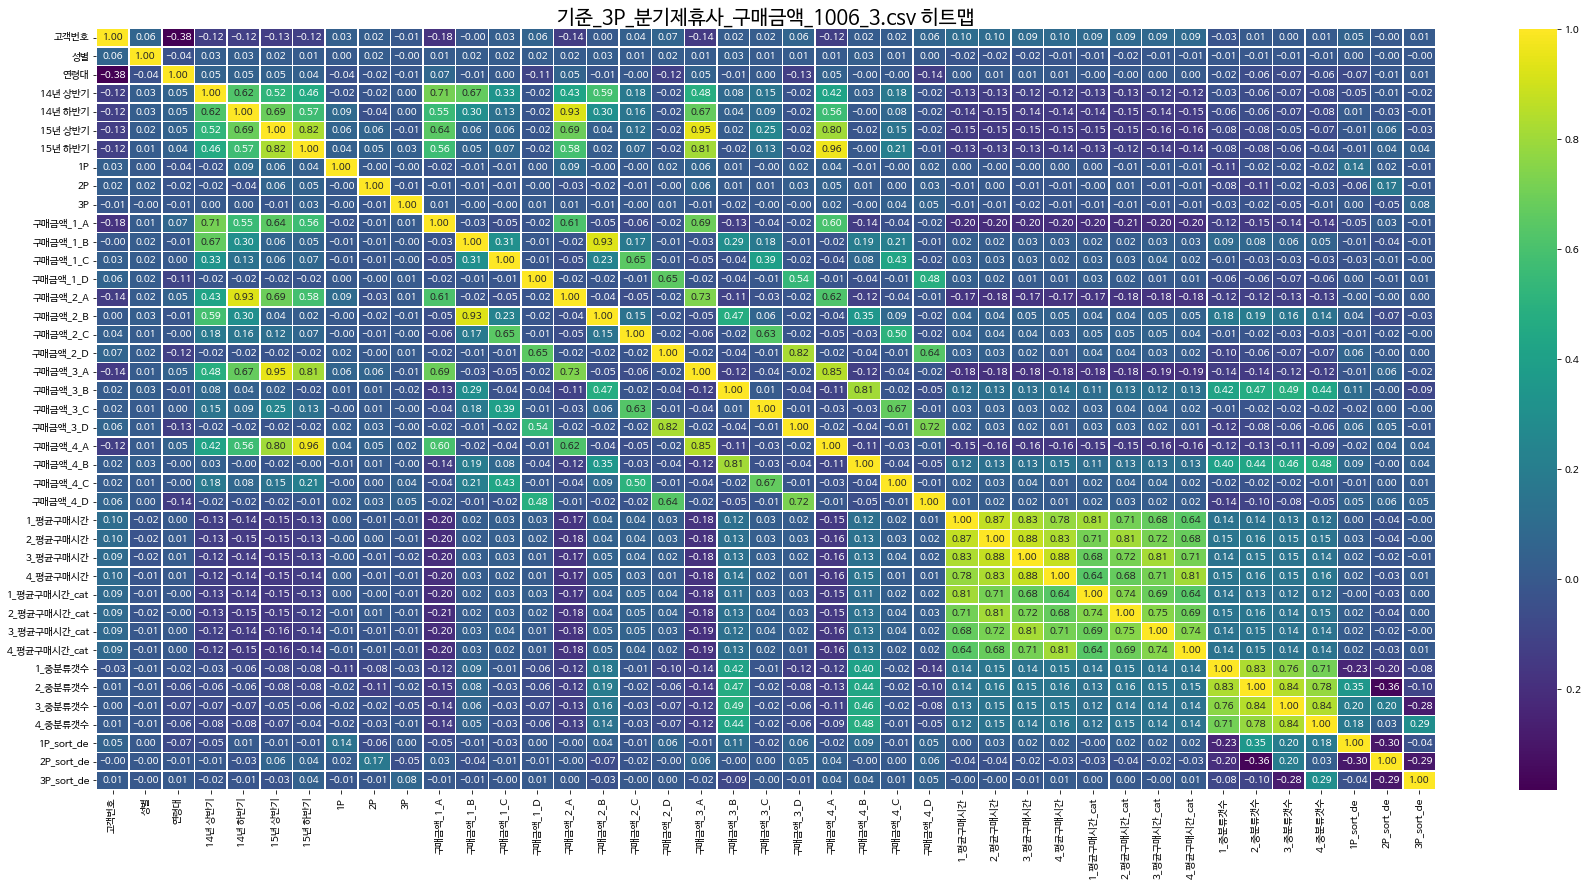

In [ ]:
plt.figure(figsize = (30,14))
plt.title('기준_3P_분기제휴사_구매금액_1006_3.csv 히트맵',fontsize=20)
sns.heatmap(data_std_corr,cmap='viridis',annot = True, fmt = '.2f',linewidth=.5)



# sns.heatmap(data, 
#             annot = True, fmt = '.0f', 
#             annot_kws = {'size' : 20})



In [ ]:
data_std = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1010/기준데이터셋.csv',encoding='cp949',index_col=0)

In [ ]:
data_std.head()

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat,1P_sort_de,2P_sort_de,3P_sort_de
0,1,M,60대,1733,684,2256,3570,0.712206,-0.475372,-0.267949,1620,14492,5628,0,658,10577,4873,0,2164,11859,5196,0,3329,12089,6510,0,0,0,0,0,13,-5,-6
1,2,M,60대,1225,1659,1054,1361,-0.098718,0.267744,-0.070086,1136,14214,0,0,1516,14223,0,0,997,12731,0,288,1264,0,0,877,0,0,0,0,4,3,-5
2,3,M,60대,18509,18679,18962,18808,0.224783,-0.431895,0.146616,13948,0,4069,0,0,15483,3885,0,0,0,4510,0,0,0,4284,0,0,0,0,0,1,-6,7
3,4,F,60대,7745,9679,11255,10886,-0.155609,-0.141062,0.021964,6376,12981,4985,0,7326,10333,6313,0,7629,10823,6086,0,7905,8992,5617,0,0,0,0,0,5,-2,-3
4,5,M,60대,7209,15910,13528,14442,-0.592368,0.318637,-0.108578,5882,14671,0,0,8542,0,0,0,7821,0,0,1094,8059,0,0,1093,0,0,0,0,-4,-2,1
